#Naive Bayes Classifier
Naive Bayes adalah teknik klasifikasi statistik berdasarkan Bayes Theorem. Ini adalah salah satu supervised learning algorithms yang paling sederhana. Naive Bayes classifier adalah algoritme yang cepat, akurat, dan andal. Naive Bayes classifier memiliki akurasi dan kecepatan tinggi pada kumpulan data besar.

In [ ]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)

print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [ ]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

print("Temp:",temp_encoded)
print("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
#Combinig weather and temp into single list of tuples

features=list(zip(weather_encoded,temp_encoded))

features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1]


#Naive Bayes with Multiple Labels
Sampai saat ini kita  telah mempelajari klasifikasi Naive Bayes dengan label biner. Sekarang kita akan belajar tentang multiple class classification di Naive Bayes. Yang dikenal sebagai multinomial Naive Bayes classification. Misalnya, jika kita ingin mengklasifikasikan artikel berita tentang teknologi, hiburan, politik, atau olahraga.

Pada bagian pembuatan model, kita dapat menggunakan dataset wine yang merupakan multi-class classification yang sangat terkenal. Kumpulan data ini adalah hasil dari analisis kimiawi anggur yang ditanam di wilayah yang sama di Italia tetapi berasal dari tiga kultivar berbeda.

Set data terdiri dari 13 fitur (alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline) dan type of wine cultivar. Data ini memiliki tiga jenis anggur Class_0, Class_1, dan Class_3. Di sini kita  dapat membuat model untuk mengklasifikasikan jenis anggur.

Dataset tersedia di pustaka scikit-learn.

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [ ]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

In [ ]:
Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']

In [ ]:
wine.data.shape

(178, 13)

In [ ]:
# print the wine data features (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [ ]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


#Decision Tree Classifier
Decision tree adalah flowchart-like tree structure di mana internal node mewakili feature(atau attribute), branch mewakili decision rule, dan setiap leaf node mewakili outcome. Node paling atas dalam pohon keputusan dikenal sebagai root node. Root node belajar untuk mempartisi berdasarkan nilai atribut. Root node mempartisi pohon secara rekursif memanggil partisi rekursif. Flowchart-like structure ini membantu kita dalam pengambilan keputusan. Visualisasinya seperti diagram flowchart yang dengan mudah meniru pemikiran tingkat manusia. Itulah mengapa decision trees mudah dipahami dan diinterpretasikan.

In [ ]:
# Load libraries
import pandas as pd

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv", header=None, names=col_names)

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
numer = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'label']

for col in numer: # coerce for missing values
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

In [ ]:
pima.dropna(inplace=True)

In [ ]:

#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

X = pima[feature_cols] # Features
y = pima.label # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


#Visualizing Decision Trees

In [ ]:
!pip install graphviz

In [ ]:
!pip install pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


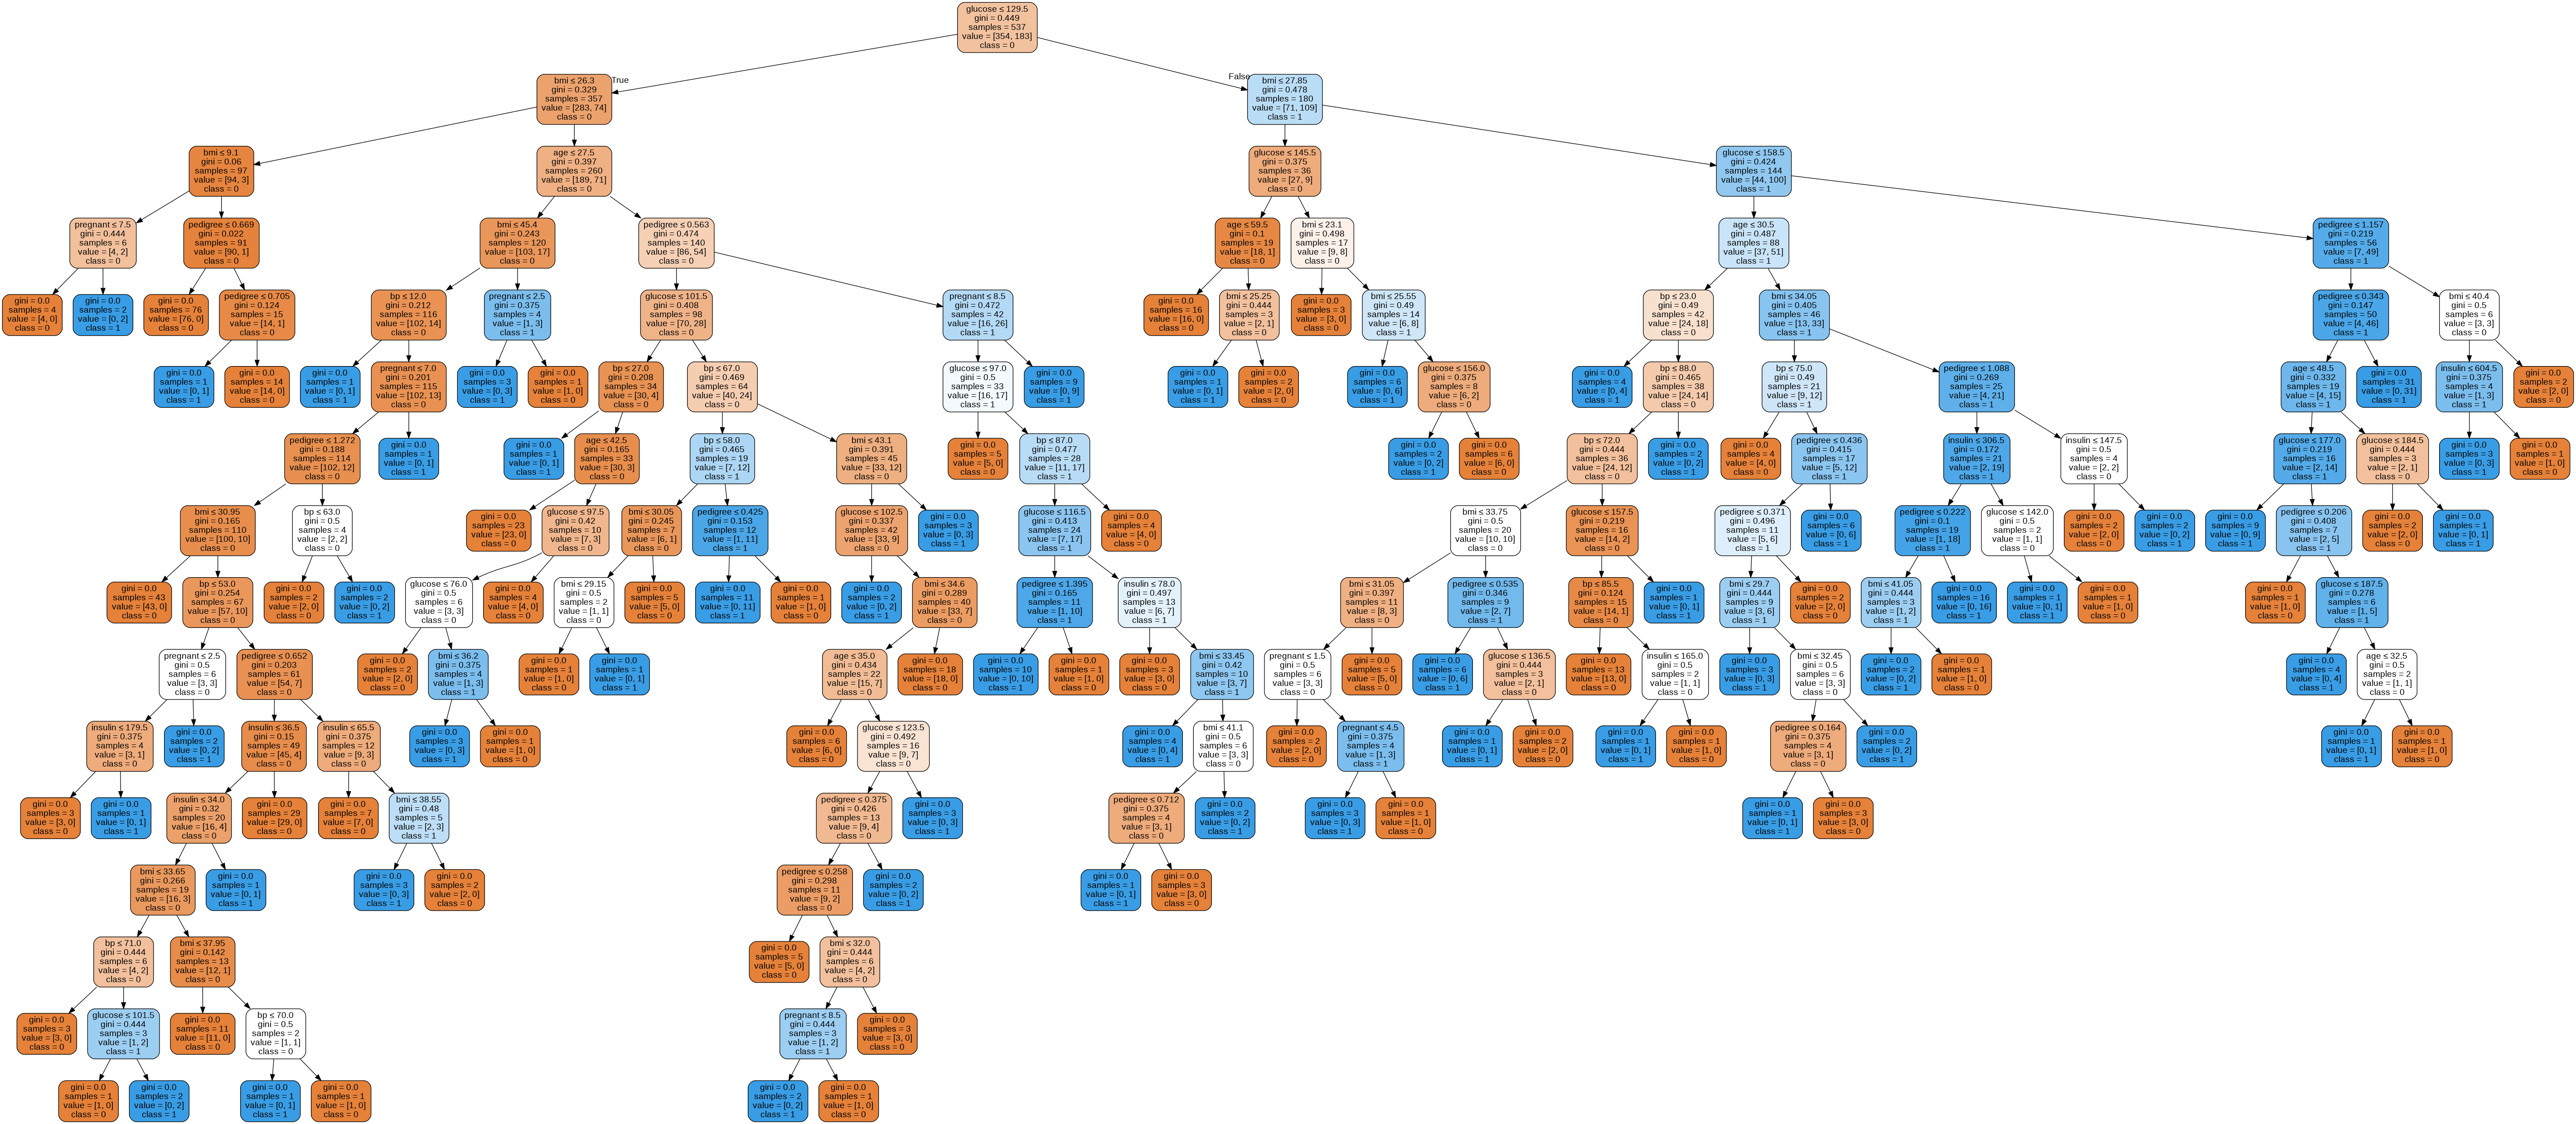

In [ ]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image


dot_data = StringIO()
tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=['0','1'], # the target names.
 feature_names=feature_cols, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [ ]:
modelopt = clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
modelopt = modelopt.fit(X_train,y_train)
modelopt_y_pred = modelopt.predict(X_test)
metrics.accuracy_score(modelopt_y_pred,y_test)

0.7878787878787878

#Random Forests vs Decision Trees
Kita akan membuat model pada kumpulan data iris flower, yang merupakan kumpulan klasifikasi yang sangat terkenal. Terdiri dari sepal length, sepal width, petal length, petal width, dan jenis bunga. Ada tiga spesies atau kelas: setosa, versicolor, dan virginia. Kita akan membangun model untuk mengklasifikasikan jenis bunga. Dataset tersedia di pustaka scikit-learn atau kita dapat mengunduhnya dari Repositori Machine Learning UCI.

Mulailah dengan mengimpor pustaka kumpulan data dari scikit-learn, dan muat kumpulan data iris dengan load_iris().

In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'] #berikan header
iris_df = pd.read_csv(path, names = headernames) #baca dataset dari file csv 
iris_df.head()

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets 

#Load dataset
iris = datasets.load_iris()

In [ ]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names) 

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# print the iris data (top 5 records)
print(iris.data[0:5]) 

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# Creating a DataFrame of given iris dataset.
import pandas as pd

data=pd.DataFrame({    
    'sepal length':iris.data[:,0],    
    'sepal width':iris.data[:,1],    
    'petal length':iris.data[:,2],    
    'petal width':iris.data[:,3],    
    'species':iris.target 
}) 

data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split 

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
 
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
 
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train) 

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [ ]:
clf.predict([[3, 5, 4, 2]])

array([1])

#Finding Important Features in Scikit-learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100) 

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
import pandas as pd

feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False) 

feature_imp

petal length (cm)    0.477564
petal width (cm)     0.414710
sepal length (cm)    0.087502
sepal width (cm)     0.020224
dtype: float64

No handles with labels found to put in legend.


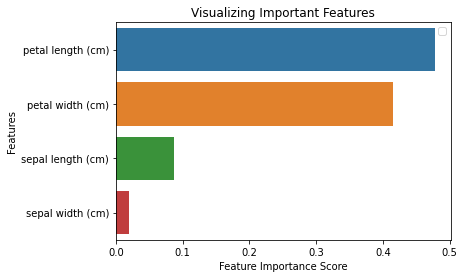

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#Generating the Model on Selected Features

In [ ]:
#import train_test_split function
from sklearn.cross_validation import train_test_split

# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]
y=data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5)

ModuleNotFoundError: ignored

In [ ]:
# Import train_test_split function
from sklearn.cross_validation import train_test_split

# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]
y=data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5)

ModuleNotFoundError: ignored

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100) 

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train) 

# prediction on test set
y_pred=clf.predict(X_test) 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# **test**

In [ ]:
import sklearn.datasets as datasets
from  sklearn.ensemble import RandomForestClassifier
import pandas as pd
datasets = datasets.load_iris()
from sklearn.model_selection import train_test_split

In [ ]:
irisDF = pd.DataFrame({
    "sepal_length" : datasets.data[:, 0], 
    "sepal_width" : datasets.data[: ,1],
    "petal_length" : datasets.data[: ,2],
    "species": datasets.target
})

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(irisDF[["sepal_length",
                                                            "sepal_width", 
                                                            "petal_length"]],
                                                    irisDF.species )


classifier = RandomForestClassifier(n_estimators=50)
classifier = classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
y_pred

array([1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2])

In [ ]:
metrics.accuracy_score(y_pred,Y_test)

0.8947368421052632

# svm